In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
training_data_path = 'dataset/UNSW_NB15_training-set.csv'
training_data = pd.read_csv(training_data_path)

# Display the first few rows of the training dataset
print(training_data.head())

# Encode categorical variables
cat_columns = ["proto", "service", "state"]
encoder = LabelEncoder()
for col in cat_columns:
    training_data[col] = encoder.fit_transform(training_data[col])

# Separate features and target variable
X = training_data.drop(columns=["id", "attack_cat", "label"])
y = training_data["label"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Save the encoder and scaler
with open("encoder.pkl", "wb") as encoder_file:
    pickle.dump(encoder, encoder_file)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = rf_clf.predict(X_val_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Save the trained model
with open("best_model.pkl", "wb") as model_file:
    pickle.dump(rf_clf, model_file)










   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

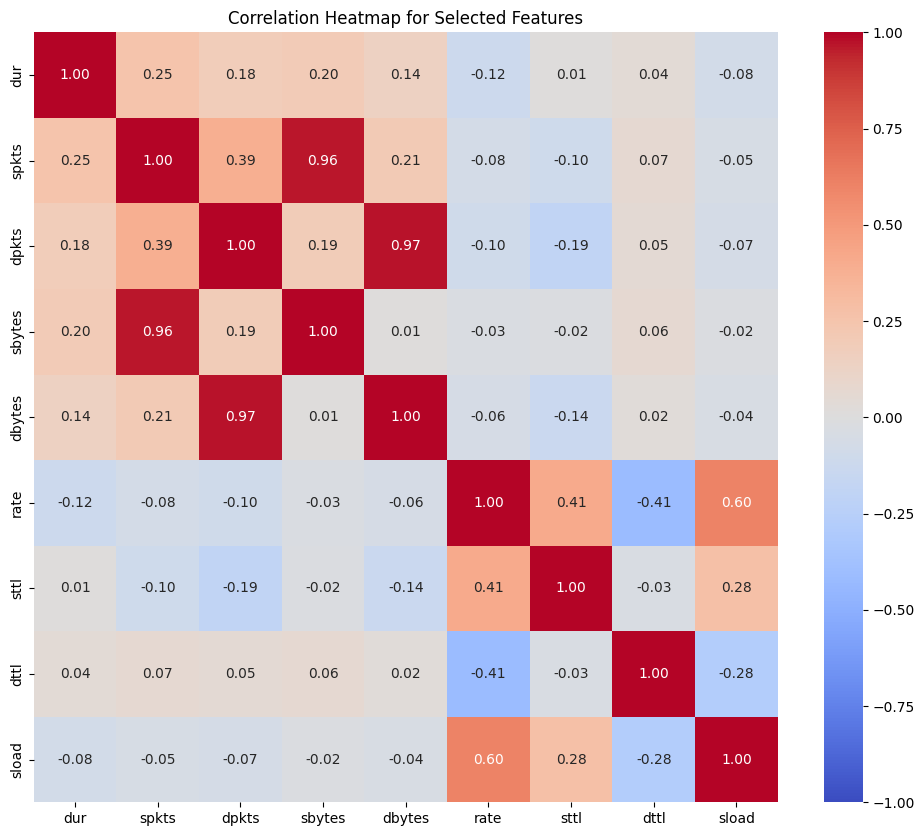

In [11]:
# Correlation heatmap for a broader range of features
subset_features = ["dur", "spkts", "dpkts", "sbytes", "dbytes", "rate", "sttl", "dttl", "sload"]
plt.figure(figsize=(12, 10))
correlation_matrix = training_data[subset_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Selected Features")
plt.show()


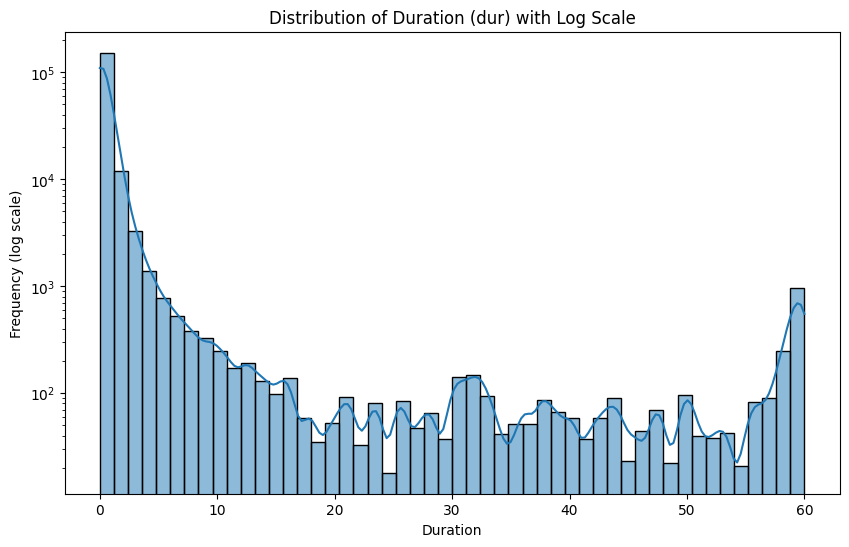

In [10]:
# Distribution of the 'dur' feature with log scale
plt.figure(figsize=(10, 6))
sns.histplot(training_data['dur'], bins=50, kde=True)
plt.yscale('log')
plt.title('Distribution of Duration (dur) with Log Scale')
plt.xlabel('Duration')
plt.ylabel('Frequency (log scale)')
plt.show()


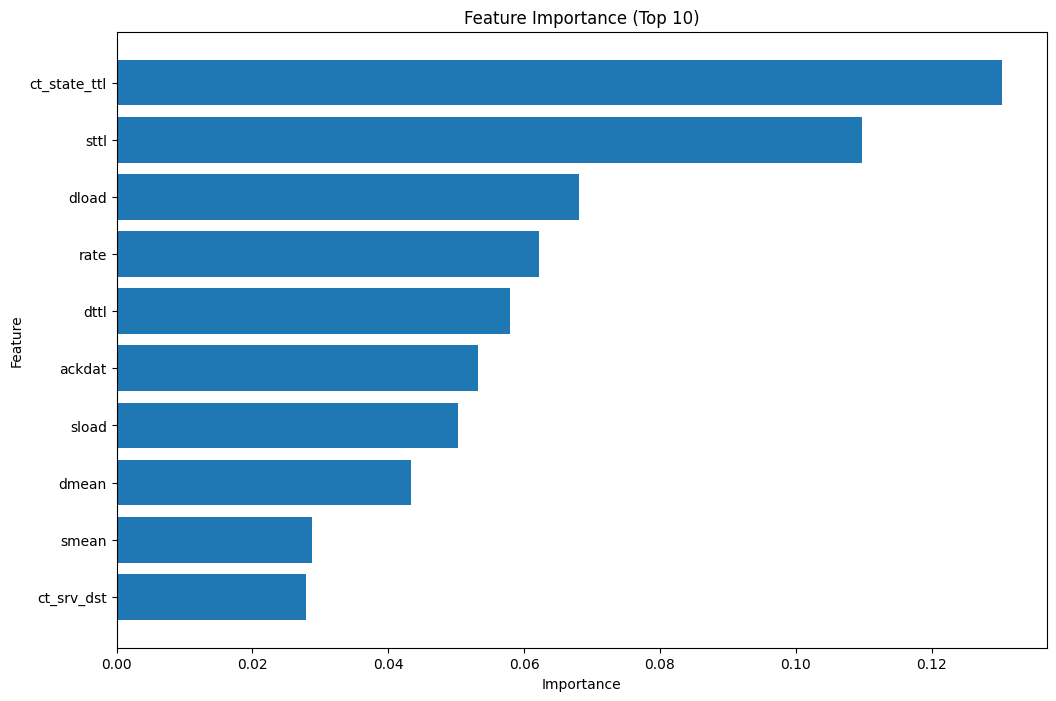

In [12]:
# Feature importance from the trained Random Forest model (top 10 features)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices[:10]]  # Top 10 features

plt.figure(figsize=(12, 8))
plt.title("Feature Importance (Top 10)")
plt.barh(range(10), importances[indices[:10]], align="center")
plt.yticks(range(10), names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


C:\Users\anixk\AppData\Local\Temp\ipykernel_32024\2639669875.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Rectangle((x, y), w, h, fill=True, color="skyblue", edgecolor="black"))


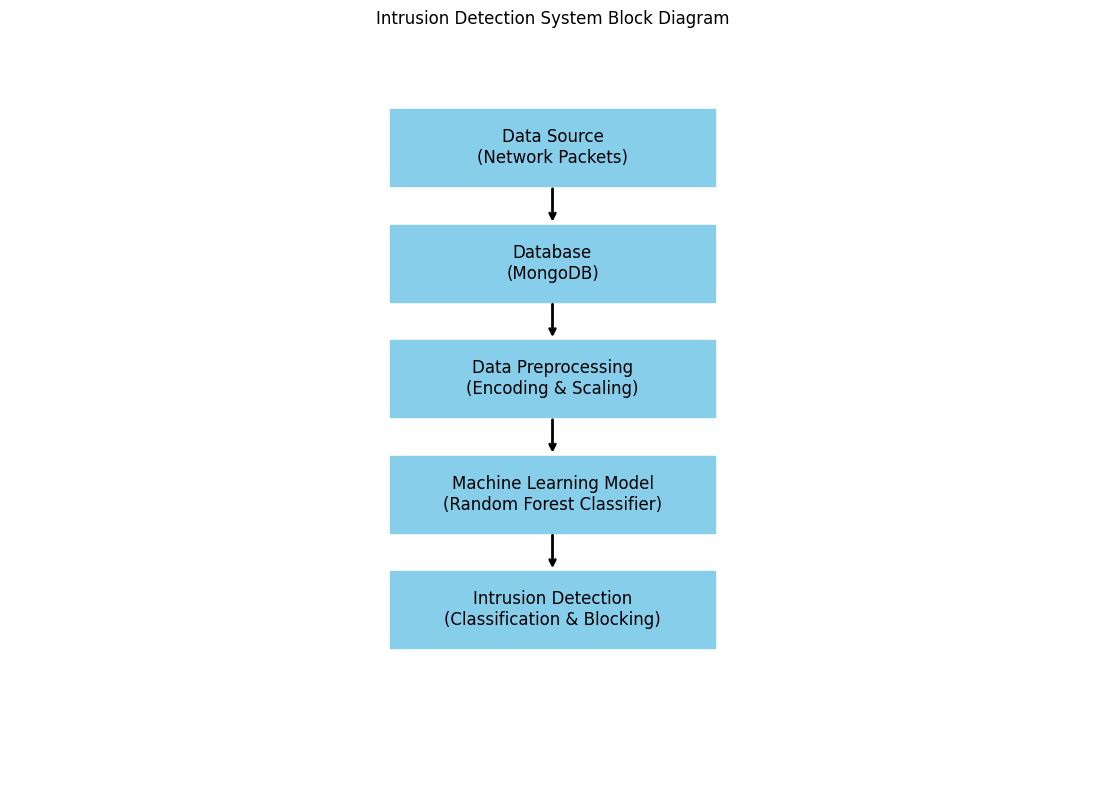

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure
fig, ax = plt.subplots(figsize=(14, 10))

# Add rectangles for each block
blocks = {
    "Data Source\n(Network Packets)": (0.35, 0.8, 0.3, 0.1),
    "Database\n(MongoDB)": (0.35, 0.65, 0.3, 0.1),
    "Data Preprocessing\n(Encoding & Scaling)": (0.35, 0.5, 0.3, 0.1),
    "Machine Learning Model\n(Random Forest Classifier)": (0.35, 0.35, 0.3, 0.1),
    "Intrusion Detection\n(Classification & Blocking)": (0.35, 0.2, 0.3, 0.1),
}

for text, (x, y, w, h) in blocks.items():
    ax.add_patch(patches.Rectangle((x, y), w, h, fill=True, color="skyblue", edgecolor="black"))
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=12)

# Add arrows to show flow
arrow_params = dict(arrowstyle="->", lw=2, color='black')

# Arrow from Data Source to Database
ax.annotate('', xy=(0.5, 0.75), xytext=(0.5, 0.8), arrowprops=arrow_params)
# Arrow from Database to Data Preprocessing
ax.annotate('', xy=(0.5, 0.6), xytext=(0.5, 0.65), arrowprops=arrow_params)
# Arrow from Data Preprocessing to Machine Learning Model
ax.annotate('', xy=(0.5, 0.45), xytext=(0.5, 0.5), arrowprops=arrow_params)
# Arrow from Machine Learning Model to Intrusion Detection
ax.annotate('', xy=(0.5, 0.3), xytext=(0.5, 0.35), arrowprops=arrow_params)

# Set the limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.title('Intrusion Detection System Block Diagram')
plt.show()


C:\Users\anixk\AppData\Local\Temp\ipykernel_32024\714025735.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Rectangle((x, y), w, h, fill=True, color="lightgreen", edgecolor="black"))


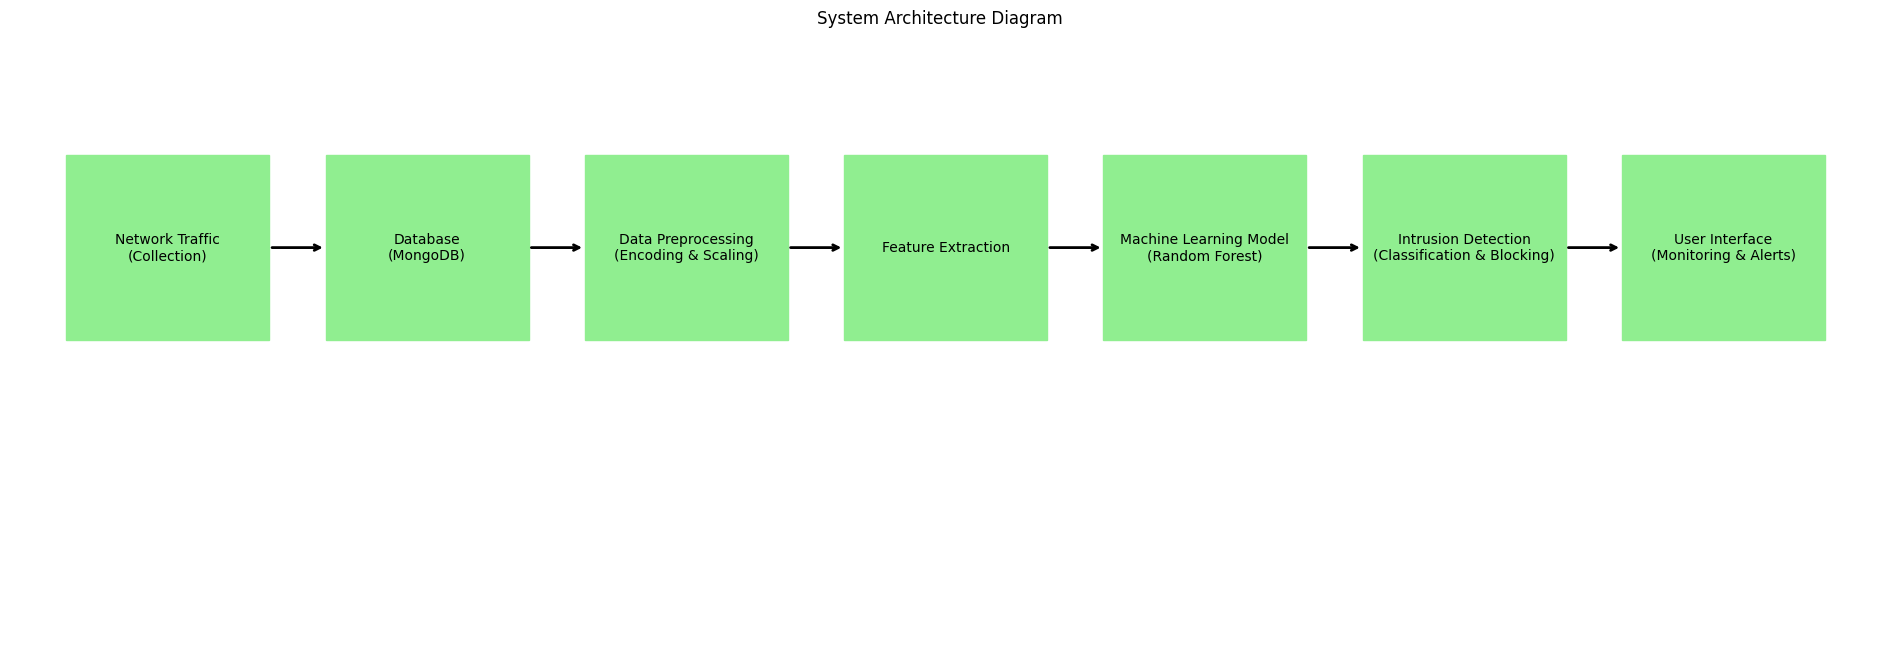

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure
fig, ax = plt.subplots(figsize=(24, 8))

# Add rectangles for each component
components = {
    "Network Traffic\n(Collection)": (0.05, 0.5, 0.18, 0.3),
    "Database\n(MongoDB)": (0.28, 0.5, 0.18, 0.3),
    "Data Preprocessing\n(Encoding & Scaling)": (0.51, 0.5, 0.18, 0.3),
    "Feature Extraction": (0.74, 0.5, 0.18, 0.3),
    "Machine Learning Model\n(Random Forest)": (0.97, 0.5, 0.18, 0.3),
    "Intrusion Detection\n(Classification & Blocking)": (1.2, 0.5, 0.18, 0.3),
    "User Interface\n(Monitoring & Alerts)": (1.43, 0.5, 0.18, 0.3),
}

for text, (x, y, w, h) in components.items():
    ax.add_patch(patches.Rectangle((x, y), w, h, fill=True, color="lightgreen", edgecolor="black"))
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=10, wrap=True)

# Add arrows to show flow
arrow_params = dict(arrowstyle="->", lw=2, color='black')

# Add arrows between components
flows = [
    ((0.23, 0.65), (0.28, 0.65)),  # Network Traffic -> Database
    ((0.46, 0.65), (0.51, 0.65)),  # Database -> Data Preprocessing
    ((0.69, 0.65), (0.74, 0.65)),  # Data Preprocessing -> Feature Extraction
    ((0.92, 0.65), (0.97, 0.65)),  # Feature Extraction -> ML Model
    ((1.15, 0.65), (1.2, 0.65)),  # ML Model -> Intrusion Detection
    ((1.38, 0.65), (1.43, 0.65)),  # Intrusion Detection -> User Interface
]

for start, end in flows:
    ax.annotate('', xy=end, xytext=start, arrowprops=arrow_params)

# Set the limits and remove axes
ax.set_xlim(0, 1.65)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.title('System Architecture Diagram')
plt.show()



C:\Users\anixk\AppData\Local\Temp\ipykernel_32024\2276767293.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Rectangle((x, y), w, h, fill=True, color="lightcoral", edgecolor="black"))


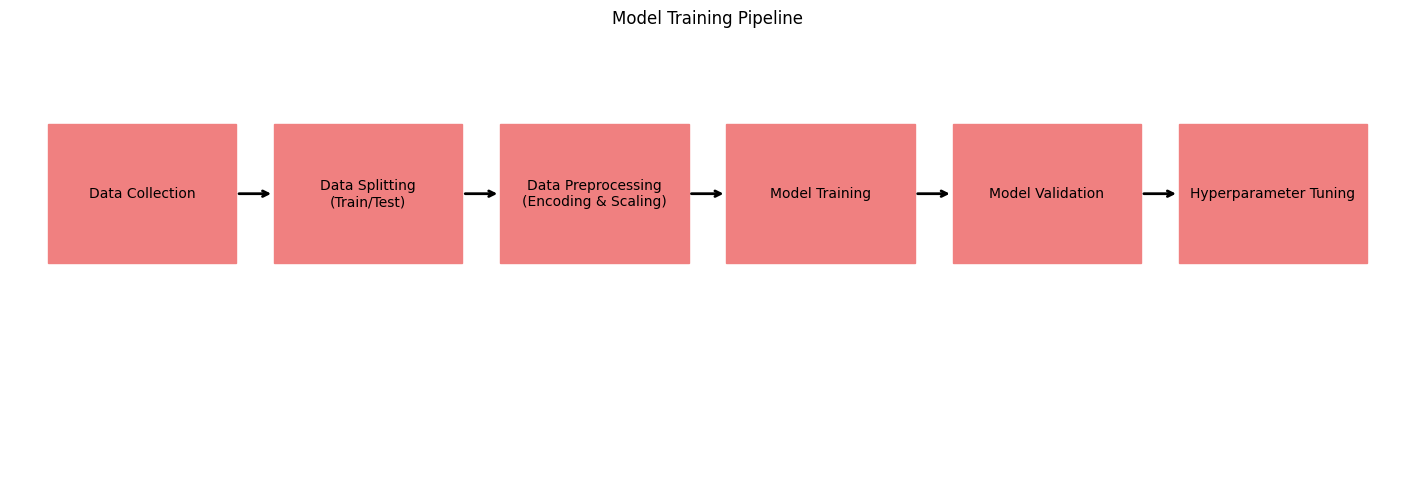

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure
fig, ax = plt.subplots(figsize=(18, 6))

# Add rectangles for each step
steps = {
    "Data Collection": (0.05, 0.5, 0.25, 0.3),
    "Data Splitting\n(Train/Test)": (0.35, 0.5, 0.25, 0.3),
    "Data Preprocessing\n(Encoding & Scaling)": (0.65, 0.5, 0.25, 0.3),
    "Model Training": (0.95, 0.5, 0.25, 0.3),
    "Model Validation": (1.25, 0.5, 0.25, 0.3),
    "Hyperparameter Tuning": (1.55, 0.5, 0.25, 0.3)
}

for text, (x, y, w, h) in steps.items():
    ax.add_patch(patches.Rectangle((x, y), w, h, fill=True, color="lightcoral", edgecolor="black"))
    ax.text(x + w/2, y + h/2, text, ha="center", va="center", fontsize=10)

# Add arrows to show flow
arrow_params = dict(arrowstyle="->", lw=2, color='black')

# Arrows to show flow
flows = [
    ((0.3, 0.65), (0.35, 0.65)),  # Data Collection -> Data Splitting
    ((0.6, 0.65), (0.65, 0.65)),  # Data Splitting -> Data Preprocessing
    ((0.9, 0.65), (0.95, 0.65)),  # Data Preprocessing -> Model Training
    ((1.2, 0.65), (1.25, 0.65)),  # Model Training -> Model Validation
    ((1.5, 0.65), (1.55, 0.65)),  # Model Validation -> Hyperparameter Tuning
]

for start, end in flows:
    ax.annotate('', xy=end, xytext=start, arrowprops=arrow_params)

# Set the limits and remove axes
ax.set_xlim(0, 1.85)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.title('Model Training Pipeline')
plt.show()



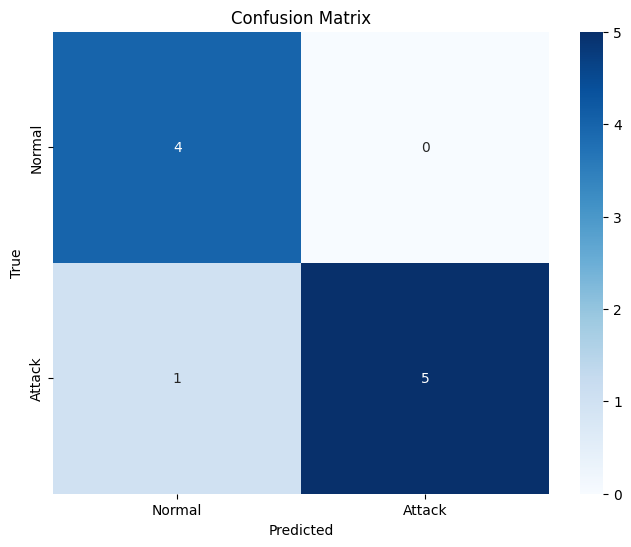

Classification Report:

              precision    recall  f1-score   support

      Normal       0.80      1.00      0.89         4
      Attack       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Example predictions and true values
y_true = [0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 1, 0, 1, 1, 1]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Precision, recall, and F1-score
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=["Normal", "Attack"])

print("Classification Report:\n")
print(report)

